In [73]:
import subprocess

def getClipboardData():
    p = subprocess.Popen(['pbpaste'], stdout=subprocess.PIPE)
    retcode = p.wait()
    data = p.stdout.read()
    return data


In [102]:
all = getClipboardData()

In [103]:
all = all.decode("utf8").replace("\r","")

In [104]:
import matplotlib.pyplot as plt
import mplcursors
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd


In [105]:
arr = [x.split("\t")for x in all.strip("\n").strip("\r").split("\n")]

In [106]:
len(arr)

2235

In [107]:
arr

[['0', '0'],
 ['0', '0'],
 ['0/0', '0/0'],
 ['IMPV', 'IMPF'],
 ['0/0', '0/0'],
 ['0', '0'],
 ['IMPV', 'IMPV'],
 ['PERF', 'PERF'],
 ['0/0', '0/0'],
 ['0', '0'],
 ['0', '0'],
 ['0', '0'],
 ['0', '0'],
 ['IMPF/0', 'IMPF/0'],
 ['PERF/0', 'PERF/0'],
 ['0/0/0', '0/0/0'],
 ['0/0', '0/0'],
 ['0/0', '0/0'],
 ['0', '0'],
 ['0', '0'],
 ['PERF', 'PERF'],
 ['PERF/0', 'PERF/0'],
 ['0/0/0', '0/0/0'],
 ['0/0', '0/0'],
 ['0', '0'],
 ['0/0', '0/0'],
 ['0/0/0', '0/0/0'],
 ['0/0', '0/0'],
 ['0', '0'],
 ['0', '0'],
 ['0/0', '0/0'],
 ['IMPF/0', 'IMPF/0'],
 ['0/0', '0/0'],
 ['0', '0'],
 ['PERF', '0'],
 ['0/0', '0/0'],
 ['0', '0'],
 ['0', '0'],
 ['0/0', '0/0'],
 ['0', '0'],
 ['0', '0'],
 ['0/0', '0/0'],
 ['0', '0'],
 ['0/0/0', '0/0/0'],
 ['PERF/0', 'PERF/0'],
 ['0', '0'],
 ['0', '0'],
 ['0/0', '0/0'],
 ['0', '0'],
 ['IMPF/0', 'IMPF/0'],
 ['0/0', '0/0'],
 ['0/0', '0/0'],
 ['0/0', '0/0'],
 ['0', '0'],
 ['PERF', 'PERF'],
 ['0', '0'],
 ['0', '0'],
 ['0/0', '0/0'],
 ['0', '0'],
 ['0', '0'],
 ['0/0', '0/0'],
 ['0/0

In [108]:
y_pred = []
y_actual = []
for x in arr:
    a = x[0].split("/")
    b = x[1].split("/")
    if len(a) != len(b):
        print(x)
        continue
    for xx in a:
        y_pred.append(xx)
    for xx in b:
        y_actual.append(xx)

['0/0/PERF', '0/0/0/0']


In [109]:
labels = list(set(y_pred+y_actual))

In [110]:
cm = confusion_matrix(y_actual, y_pred,
                      labels=labels)

df_cm = pd.DataFrame(cm, labels, labels)

In [111]:
df_cm

,IMPV,PERF,0,IMPF
IMPV,51,2,1,0
PERF,3,253,6,4
0,5,4,3299,5
IMPF,14,2,1,184


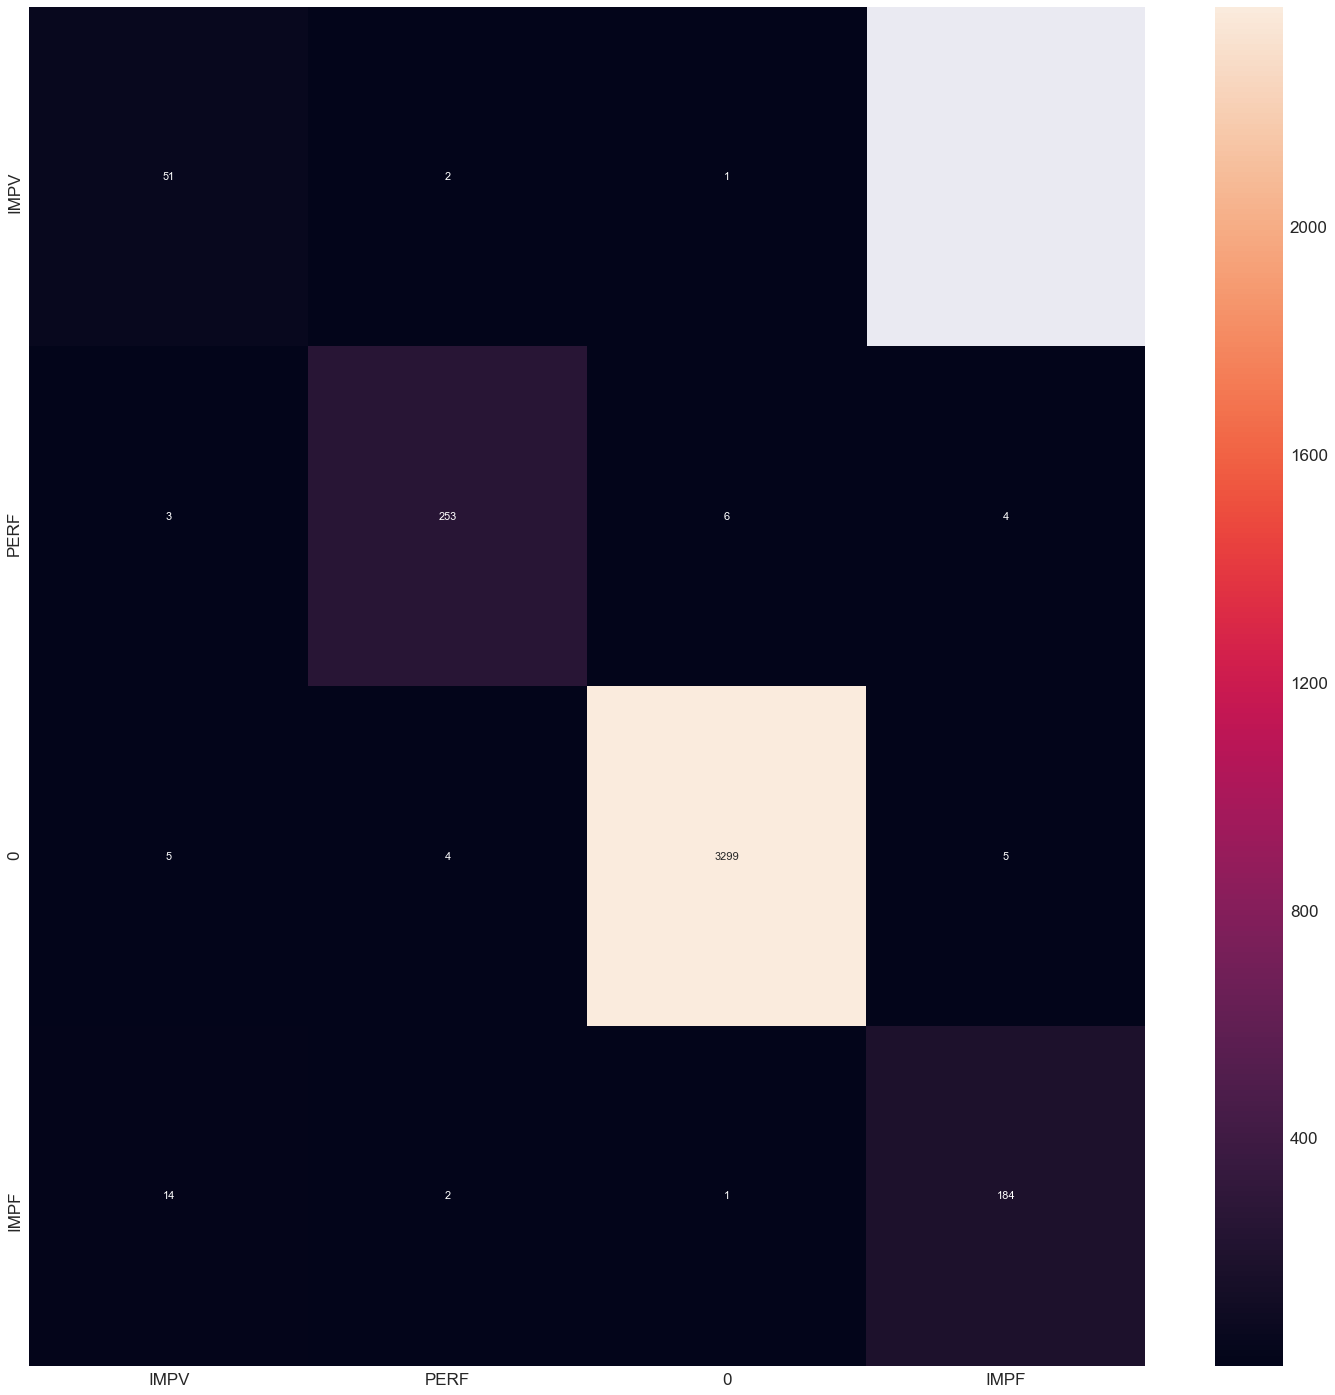

<Figure size 1800x1800 with 0 Axes>

In [112]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (25,25)
# for label size
sn.set(font_scale=1.7)

# font size
sn.heatmap(df_cm, fmt="d", annot=True, robust=True,
           annot_kws={"size": 11},
           yticklabels=True, xticklabels=True, mask=df_cm == 0)
mplcursors.cursor(hover=True)
plt.show()
plt.savefig('confusion_matrix.png', format='png')